In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 128 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638371 sha256=15c9bbe1ea9edb26c726ebc02edbc8cb71f349a009e4e85b376cd805571fd0f7
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
df = pd.read_csv('https://query.data.world/s/ulfoeiyhown53xn4mdumozmyutdky6')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2007791157,INVASIVE VISUAL RECORDING,2609,N,03/20/2007 02:38:00 PM,03/20/2007,1438.0,03/20/2007 02:38:00 PM,03/20/2007,1438.0,...,12.00,N,03/23/2007,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,20181410493,INDECENCY WITH A CHILD/CONTACT,1709,N,05/18/2018 04:00:00 PM,05/18/2018,1600.0,05/21/2018 09:11:00 AM,05/21/2018,911.0,...,24.07,N,09/06/2018,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,...,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,...,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,...,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2175270,201721579,VIOL OF PROTECTIVE ORDER,3009,N,01/02/2017 09:12:00 PM,01/02/2017,2112.0,01/02/2017 10:17:00 PM,01/02/2017,2217.0,...,23.15,C,01/02/2017,NaN,NaN,3118036.0,3118036.0,30.232558,-97.731967,"(30.23255819, -97.73196698)"
2175271,2013351687,CUSTODY ARREST TRAFFIC WARR,3722,N,02/04/2013 10:45:00 PM,02/04/2013,2245.0,02/04/2013 10:45:00 PM,02/04/2013,2245.0,...,13.05,C,02/11/2013,NaN,NaN,3112339.0,3112339.0,30.251071,-97.749516,"(30.25107106, -97.74951613)"
2175272,20152681539,DISTURBANCE - OTHER,3401,N,09/25/2015 05:49:00 PM,09/25/2015,1749.0,09/25/2015 08:17:00 PM,09/25/2015,2017.0,...,20.05,N,09/29/2015,NaN,NaN,3102372.0,3102372.0,30.240661,-97.781366,"(30.24066148, -97.7813662)"
2175273,2005441710,ASSAULT BY CONTACT,902,N,02/13/2005 07:26:00 PM,02/13/2005,1926.0,02/13/2005 07:26:00 PM,02/13/2005,1926.0,...,21.10,N,11/10/2005,NaN,NaN,3133317.0,3133317.0,30.267650,-97.682603,"(30.26765018, -97.68260306)"
2175274,20102102341,DWI,2100,N,07/29/2010 10:24:00 PM,07/29/2010,2224.0,07/29/2010 10:24:00 PM,07/29/2010,2224.0,...,17.47,C,07/30/2010,NaN,NaN,3086887.0,3086887.0,30.176576,-97.832076,"(30.17657648, -97.83207608)"


In [ ]:
df.shape

(2175275, 27)

In [ ]:
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])

Number of rows 2175275
Number of columns 27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175275 entries, 0 to 2175274
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

In [ ]:
df.isnull().sum()

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20720
Address                             12
Zip Code                         13763
Council District                 46555
APD Sector                        8807
APD District                      9287
PRA                              10447
Census Tract                     12945
Clearance Status                593417
Clearance Date                  324193
UCR Category                   1440092
Category Description           1440092
X-coordinate                      9862
Y-coordinate                      9862
Latitude                         37010
Longitude                

In [ ]:
df.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
df3 = df[['Incident Number','Highest Offense Description','Highest Offense Code', 'Family Violence', 'Occurred Date Time','Occurred Date', 'Occurred Time', 'Location Type', 'Address', 'Zip Code']]

In [ ]:
df3.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Location Type,Address,Zip Code
0,2007791157,INVASIVE VISUAL RECORDING,2609,N,03/20/2007 02:38:00 PM,03/20/2007,1438.0,SCHOOLS / COLLEGES,1700 BLOCK W CESAR CHAVEZ ST,78703.0
1,20181410493,INDECENCY WITH A CHILD/CONTACT,1709,N,05/18/2018 04:00:00 PM,05/18/2018,1600.0,STREETS / HWY / ROAD / ALLEY,10700 BLOCK S 1ST ST,78748.0
2,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN
3,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN
4,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN


In [ ]:
df3.shape

(2175275, 10)

In [ ]:
df3.isnull().sum()

Incident Number                    0
Highest Offense Description        0
Highest Offense Code               0
Family Violence                    0
Occurred Date Time               165
Occurred Date                      0
Occurred Time                     84
Location Type                  20720
Address                           12
Zip Code                       13763
dtype: int64

In [ ]:
df3 = df3.dropna()

In [ ]:
df3.isnull().sum()

Incident Number                0
Highest Offense Description    0
Highest Offense Code           0
Family Violence                0
Occurred Date Time             0
Occurred Date                  0
Occurred Time                  0
Location Type                  0
Address                        0
Zip Code                       0
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141107 entries, 0 to 2175274
Data columns (total 10 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Location Type                object 
 8   Address                      object 
 9   Zip Code                     float64
dtypes: float64(2), int64(2), object(6)
memory usage: 179.7+ MB


In [ ]:
df4 = df3.rename(columns = {'Occurred Date Time': 'Date'})
df4.columns
df4.Date = pd.to_datetime(df4.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141107 entries, 0 to 2175274
Data columns (total 10 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Incident Number              int64         
 1   Highest Offense Description  object        
 2   Highest Offense Code         int64         
 3   Family Violence              object        
 4   Date                         datetime64[ns]
 5   Occurred Date                object        
 6   Occurred Time                float64       
 7   Location Type                object        
 8   Address                      object        
 9   Zip Code                     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 179.7+ MB


In [ ]:
df4['Highest Offense Description'].value_counts().head(10)

BURGLARY OF VEHICLE               218027
THEFT                             200424
FAMILY DISTURBANCE                164217
CRIMINAL MISCHIEF                 119115
BURGLARY OF RESIDENCE              74725
ASSAULT W/INJURY-FAM/DATE VIOL     73557
DWI                                66284
PUBLIC INTOXICATION                65967
HARASSMENT                         59668
DISTURBANCE - OTHER                57182
Name: Highest Offense Description, dtype: int64

In [ ]:
df4['Location Type'].value_counts().head(10)

RESIDENCE / HOME                836308
STREETS / HWY / ROAD / ALLEY    494715
PARKING LOTS / GARAGE           264592
COMMERCIAL / OFFICE BUILDING    146277
OTHER / UNKNOWN                  64071
DEPARTMENT / DISCOUNT STORE      39807
GROCERY / SUPERMARKET            33363
HOTEL / MOTEL / ETC.             31624
RESTAURANTS                      30411
CONVENIENCE STORE                29229
Name: Location Type, dtype: int64

In [ ]:
df4.index = pd.DatetimeIndex(df4.Date)

In [ ]:
df4

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Date,Occurred Date,Occurred Time,Location Type,Address,Zip Code
Date,,,,,,,,,,
2007-03-20 14:38:00,2007791157,INVASIVE VISUAL RECORDING,2609,N,2007-03-20 14:38:00,03/20/2007,1438.0,SCHOOLS / COLLEGES,1700 BLOCK W CESAR CHAVEZ ST,78703.0
2018-05-18 16:00:00,20181410493,INDECENCY WITH A CHILD/CONTACT,1709,N,2018-05-18 16:00:00,05/18/2018,1600.0,STREETS / HWY / ROAD / ALLEY,10700 BLOCK S 1ST ST,78748.0
2003-02-21 01:39:00,2003920520135,INDECENT EXPOSURE,1706,N,2003-02-21 01:39:00,02/21/2003,139.0,PARKING LOTS / GARAGE,8800 BLOCK N I 35 SB SVC RD,78753.0
2003-10-20 18:36:00,20032931224,SUSPICIOUS PERSON,3403,N,2003-10-20 18:36:00,10/20/2003,1836.0,STREETS / HWY / ROAD / ALLEY,2600 BLOCK WILLOW ST,78702.0
2016-05-20 12:00:00,20165025422,STATUTORY RAPE OF CHILD,208,N,2016-05-20 12:00:00,05/20/2016,1200.0,RESIDENCE / HOME,1400 BLOCK W BRAKER LN,78758.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-02 21:12:00,201721579,VIOL OF PROTECTIVE ORDER,3009,N,2017-01-02 21:12:00,01/02/2017,2112.0,RESIDENCE / HOME,2101 BURTON DR,78741.0
2013-02-04 22:45:00,2013351687,CUSTODY ARREST TRAFFIC WARR,3722,N,2013-02-04 22:45:00,02/04/2013,2245.0,STREETS / HWY / ROAD / ALLEY,1300 S CONGRESS AVE,78704.0
2015-09-25 17:49:00,20152681539,DISTURBANCE - OTHER,3401,N,2015-09-25 17:49:00,09/25/2015,1749.0,RESIDENCE / HOME,2003 GLEN ALLEN,78704.0


Text(0, 0.5, 'Number of Crimes')

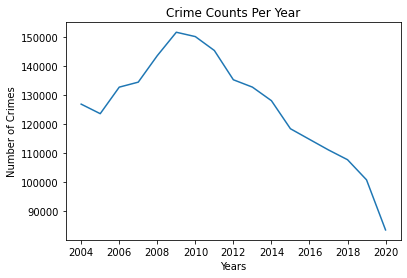

In [ ]:
plt.plot(df4.resample('Y').size())
plt.title("Crime Counts Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

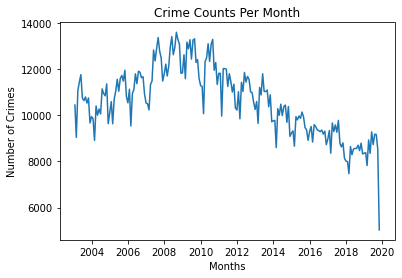

In [ ]:
plt.plot(df4.resample('M').size())
plt.title("Crime Counts Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

In [ ]:
df_prophet = pd.DataFrame(df4.resample('M').size().reset_index())

In [ ]:
df_prophet.columns = ['Date', 'Crime_Count']

In [ ]:
df_prophet

,Date,Crime_Count
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771
...,...,...
197,2019-06-30,8733
198,2019-07-31,9184
199,2019-08-31,9170
200,2019-09-30,8542


In [ ]:
df_prophet = df_prophet.rename(columns = {'Date':'ds','Crime_Count':'y'})

In [ ]:
df_prophet

,ds,y
0,2003-01-31,10448
1,2003-02-28,9048
2,2003-03-31,11078
3,2003-04-30,11449
4,2003-05-31,11771
...,...,...
197,2019-06-30,8733
198,2019-07-31,9184
199,2019-08-31,9170
200,2019-09-30,8542


In [ ]:
df_prophet.shape

(202, 2)

In [ ]:
df_prophet_train = df_prophet.iloc[:150,:]
df_prophet_test = df_prophet.iloc[150:,:]
print("Shape of new dataframes",df_prophet_train.shape,df_prophet_test.shape)

Shape of new dataframes (150, 2) (52, 2)


In [ ]:
m= Prophet()
m.fit(df_prophet_train)
n = Prophet()
n.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred = m.make_future_dataframe(periods=24,freq = 'M')
pred1 = n.make_future_dataframe(periods=24,freq = 'M')
forcast = m.predict(pred)
forcast1 = n.predict(pred1)

In [ ]:
forcast
forcast1
metric_df1 = forcast.set_index('ds')[['yhat']].join(df_prophet_train.set_index('ds').y).reset_index()

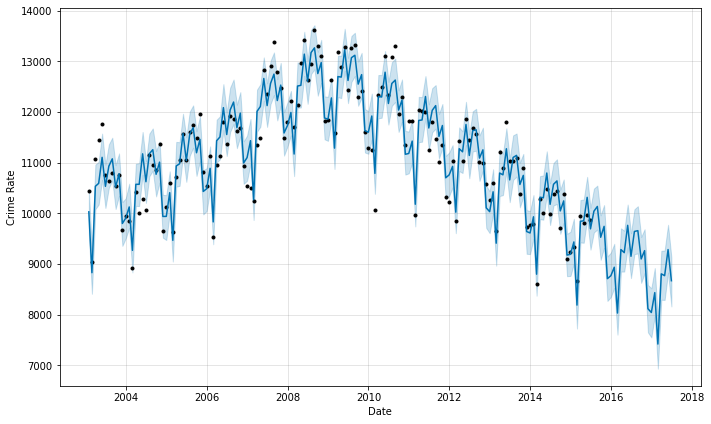

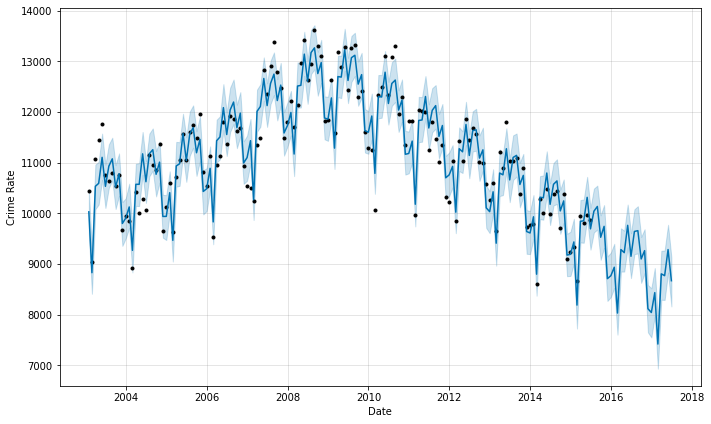

In [ ]:
m.plot(forcast,xlabel="Date",ylabel = "Crime Rate")

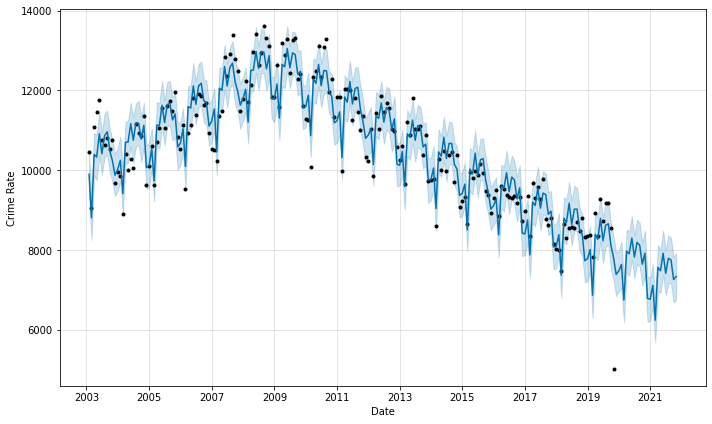

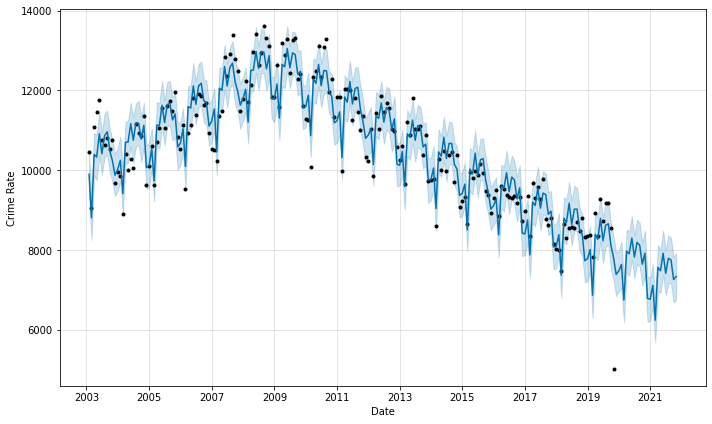

In [ ]:
n.plot(forcast1,xlabel = "Date", ylabel = "Crime Rate")

In [ ]:
import json 
from fbprophet.serialize import model_to_json, model_from_json

with open('prophet_model.json','w') as fout:
  json.dump(model_to_json(n),fout)  #Save the model

In [ ]:
with open('prophet_model.json','r') as fin:
  n1 = model_from_json(json.load(fin))  #load the model

In [ ]:
x = int(input('Enter the number of months you want to forecast'))

In [ ]:
pred1 = n1.make_future_dataframe(periods = x, freq='M')
forcast1 = n1.predict(pred1)

In [ ]:
forcast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-31,10168.917532,9338.923519,10483.402625,10168.917532,10168.917532,-269.738840,-269.738840,-269.738840,-269.738840,-269.738840,-269.738840,0.0,0.0,0.0,9899.178692
1,2003-02-28,10193.132185,8235.799313,9341.756375,10193.132185,10193.132185,-1384.278072,-1384.278072,-1384.278072,-1384.278072,-1384.278072,-1384.278072,0.0,0.0,0.0,8808.854113
2,2003-03-31,10219.941265,9877.134981,10968.578937,10219.941265,10219.941265,176.410500,176.410500,176.410500,176.410500,176.410500,176.410500,0.0,0.0,0.0,10396.351765
3,2003-04-30,10245.885536,9792.469339,10899.124239,10245.885536,10245.885536,84.274197,84.274197,84.274197,84.274197,84.274197,84.274197,0.0,0.0,0.0,10330.159733
4,2003-05-31,10272.694616,10410.351871,11447.502780,10272.694616,10272.694616,643.802929,643.802929,643.802929,643.802929,643.802929,643.802929,0.0,0.0,0.0,10916.497545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2021-06-30,7298.071562,6863.113629,7972.409031,7189.345086,7402.206169,117.167252,117.167252,117.167252,117.167252,117.167252,117.167252,0.0,0.0,0.0,7415.238814
222,2021-07-31,7263.361139,7195.562038,8372.518158,7144.956820,7374.690606,529.161094,529.161094,529.161094,529.161094,529.161094,529.161094,0.0,0.0,0.0,7792.522233
223,2021-08-31,7228.650716,7175.129310,8344.516121,7097.960348,7346.112727,526.084672,526.084672,526.084672,526.084672,526.084672,526.084672,0.0,0.0,0.0,7754.735388
224,2021-09-30,7195.059984,6711.933778,7808.927959,7054.811952,7322.510819,67.842062,67.842062,67.842062,67.842062,67.842062,67.842062,0.0,0.0,0.0,7262.902047


In [ ]:
metric_df1.dropna(inplace=True)
metric_df1.head()

,ds,yhat,y
0,2003-01-31,10028.695800,10448.0
1,2003-02-28,8826.975123,9048.0
2,2003-03-31,10533.218544,11078.0
3,2003-04-30,10591.403364,11449.0
4,2003-05-31,11105.339008,11771.0


In [ ]:
r2_score(metric_df1.y, metric_df1.yhat)

0.9112423296334878

In [ ]:
mean_absolute_error(metric_df1.y, metric_df1.yhat)

269.16193094422994